# ipywidgets Interact

#### Import `ipywidgets` and Create Data

In [ ]:
# https://github.com/kimfetti/Videos/blob/master/ipywidgets/02_ipywidgets_interact.ipynb

In [43]:
import ipywidgets as widgets

import numpy as np
from matplotlib import pyplot as plt

In [44]:
x = np.random.uniform(0, 5, size=100)
ep = np.random.normal(size=100)

y = 2*x + ep

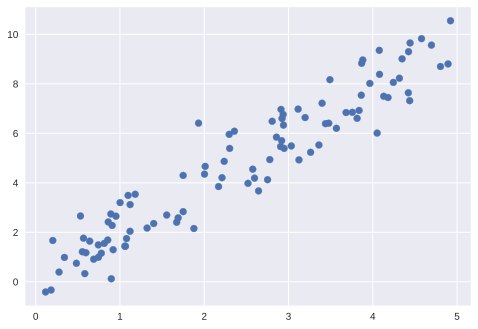

In [45]:
plt.scatter(x, y);

In [46]:
x_values = np.linspace(0, 5, 1000)

## Slider

In [69]:
def slope_viz(m=1, n=2, o=1, p=1):
    plt.scatter(x, y)
    plt.plot(x_values, m*x_values-n-o-p, lw=3, color='black')
    
    plt.ylim(-1.2, 12.2);

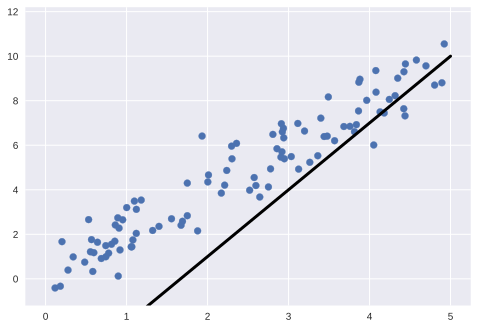

In [60]:
slope_viz(m=3, n=5)

In [63]:
widgets.interact(slope_viz, m=(0.2, 5, 0.2), n=(1,5,0.1), );

interactive(children=(FloatSlider(value=1.0, description='m', max=5.0, min=0.2, step=0.2), FloatSlider(value=2…

In [70]:
widget=interactive(slope_viz,n=1,m=2,o=4,p=7)
controls = VBox(widget.children[:-1])
output = widget.children[-1]
display(HBox([controls, output]))

In [72]:
# https://stackoverflow.com/questions/52980565/arranging-widgets-in-ipywidgets-interactive
def interact_delayed(_InteractFactory__interact_f=None, **kwargs):
    def patch(obj):
        if hasattr(obj.widget, 'layout'):
            obj.widget.layout = Layout(flex_flow='row wrap')
        for child in obj.widget.children:
            if hasattr(child, 'continuous_update'):
                child.continuous_update = False
        return obj
    if _InteractFactory__interact_f is None:
        def decorator(f):
            obj = interact(f, **kwargs)
            return patch(obj)
        return decorator
    else:
        obj = interact(_InteractFactory__interact_f, **kwargs)
        return patch(obj)

In [80]:
widget=interact_delayed(slope_viz,n=1,m=2,o=4,p=7)
##controls = VBox(widget.children[:-1])
#output = widget.children[-1]
#display(HBox([controls, output]))

interactive(children=(IntSlider(value=2, description='m', max=6, min=-2), IntSlider(value=1, description='n', …

## Dropdown List

In [8]:
widgets.interact(slope_viz, m=[0, 1, 2, 3, 4]);

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Output()), _dom_cl…

## Check Box and Text

In [9]:
def slope_viz_update(m=1, line=False, text=""):
    plt.scatter(x, y)
    
    if line:
        plt.plot(x_values, m*x_values, lw=5, color='black')
        
    if text:
        plt.text(0, 10, f"{text}\nThe slope is {m}.")
    
    plt.ylim(-1.2, 12.2);

In [10]:
widgets.interact(slope_viz_update, m=[0, 1, 2, 3, 4], line=False, text="");

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Checkbox(value=Fal…

## Custom Widgets

### Radio Buttons

In [11]:
widgets.interact(slope_viz, m=[0, 1, 2, 3, 4]);

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Output()), _dom_cl…

In [12]:
radio_buttons = widgets.RadioButtons(
    options=[0, 1, 2, 3, 4],
    value=2, 
    description='Slope: '
)

In [52]:
widgets.interact(slope_viz, m=radio_buttons);

interactive(children=(RadioButtons(description='Slope: ', index=2, options=(0, 1, 2, 3, 4), value=2), Output()…

In [ ]:
# https://stackoverflow.com/questions/52980565/arranging-widgets-in-ipywidgets-interactive

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'svg'



#importing the necessary items from the Ipywidgets library 
from ipywidgets import interactive,interact, HBox, Layout,VBox
#function to plot the different curves
def plot_function(u=1,v=2,w=3,x=4,y=5,z=6):
    time=np.arange(0,1,0.01)
    df=pd.DataFrame({"Y1":np.sin(time*u*2*np.pi),"y2":np.sin(time*v*2*np.pi),"y3":np.sin(time*w*2*np.pi),
                    "y4":np.sin(time*x*2*np.pi),"y5":np.sin(time*y*2*np.pi),"y6":np.sin(time*z*2*np.pi)})
    df.plot()
widget=interactive(plot_function,u=1,v=2,w=3,x=4,y=5,z=6)
controls = HBox(widget.children[:-1]) #, layout = Layout(flex_flow='row wrap'))

output = widget.children[-1]
display(VBox([controls, output]))

In [ ]:
def interact_delayed(_InteractFactory__interact_f=None, **kwargs):
    def patch(obj):
        if hasattr(obj.widget, 'layout'):
            obj.widget.layout = Layout(flex_flow='row wrap')
        for child in obj.widget.children:
            if hasattr(child, 'continuous_update'):
                child.continuous_update = False
        return obj
    if _InteractFactory__interact_f is None:
        def decorator(f):
            obj = interact(f, **kwargs)
            return patch(obj)
        return decorator
    else:
        obj = interact(_InteractFactory__interact_f, **kwargs)
        return patch(obj)

In [81]:
widget=interact_delayed(plot_function,u=1,v=2,w=3,x=4,y=5,z=6)

interactive(children=(IntSlider(value=1, description='u', max=3, min=-1), IntSlider(value=2, description='v', …